# BERT NLP - Session 1 - Introduction | BERT Machine Learning

#### Problem Statement
We will use the IMDB Movie Reviews Dataset, where based on the given review we have to classify the sentiments of that particular review like positive or negative.

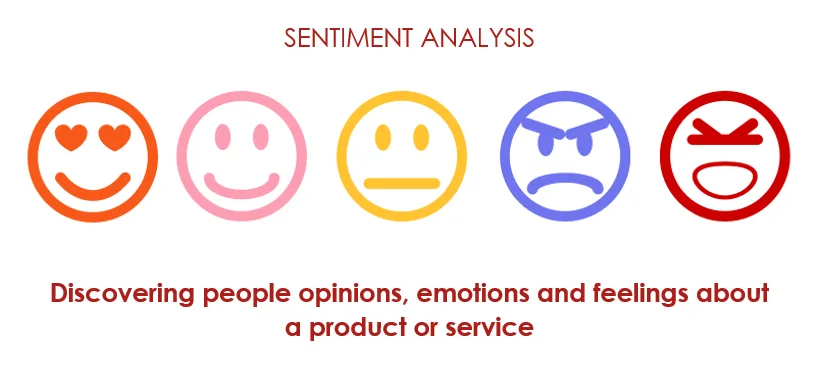

#### The motivational BERT
`BERT` became an essential ingredient of many NLP deep learning pipelines. It is considered a milestone in NLP, as `ResNet is in the computer vision field`.

Google published an article “Understanding searches better than ever before” and positioned BERT as one of its most important updates to the searching algorithms in recent years. `BERT` is a language representation model with impressive accuracy for many NLP tasks. If you understand better what people ask, you give better answers. Google says 15% of the Google queries are never seen before. The real issue is not on what people ask. Instead, it is how many ways a question may be asked. Previously, Google search was keyword-based. But this is far from understanding what people ask or clarifying the ambiguity in human language. `That is why Google has utilized BERT in its search engine`. In the example below, BERT understands the intentions of “Can you get medicine for someone pharmacy” better and returns more relevant results.

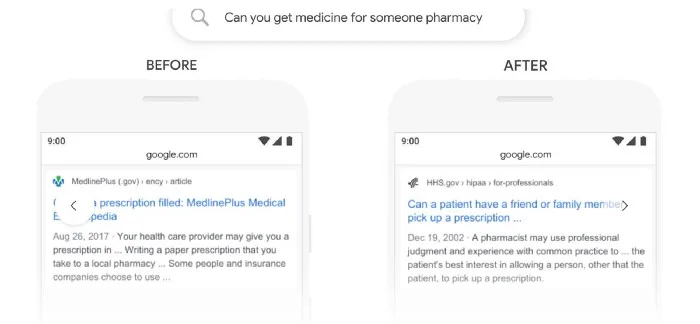

#### But the only problem with BERT is its size..!!
BERT-base is a model contains 110M parameters. The larger variant BERT-large contains 340M parameters. It’s hard to deploy a model of such size into many environments with limited resources, such as a mobile or embedded systems.

#### What is DistilBERT

##### Distillation
Another interesting model compression method is a distillation — a technique that transfers the knowledge of a large “teacher” network to a smaller “student” network. The “student” network is trained to mimic the behaviors of the “teacher” network.

A version of this strategy has already been pioneered by Rich Caruana and his collaborators. In their important paper, they demonstrate convincingly that the knowledge acquired by a large ensemble of models can be transferred to a single small model. Geoffrey Hinton et al. showed this technique can be applied to neural networks in their paper called `“Distilling the Knowledge in a Neural Network”`.

Since then this approach was applied to different neural networks, and you probably heard of a BERT distillation called `DistilBERT` by HuggingFace.

Finally, October 2nd a paper on DistilBERT called `DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter”` emerged and was submitted at NeurIPS 2019.

`DistilBERT` is a smaller language model, trained from the supervision of BERT in which authors removed the token-type embeddings and the pooler (used for the next sentence classification task) and kept the rest of the architecture identical while reducing the numbers of layers by a factor of two.

`BERT` is designed to pre-train deep bidirectional representations from the unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.

`DistilBERT` is a small, fast, cheap, and light Transformer model trained by distilling Bert base. `It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of Bert’s performances as measured on the GLUE language understanding benchmark`.

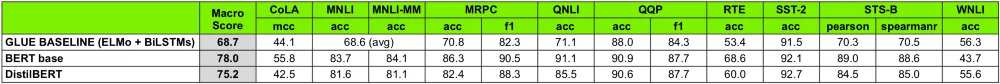

In terms of inference time, DistilBERT is more than 60% faster and smaller than BERT and 120% faster and smaller than ELMo+BiLSTM.

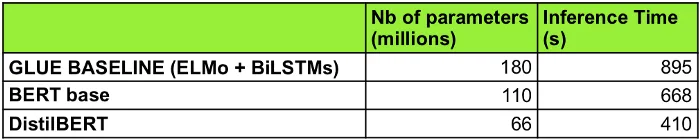

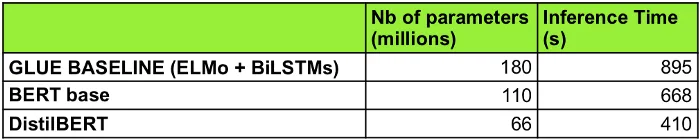

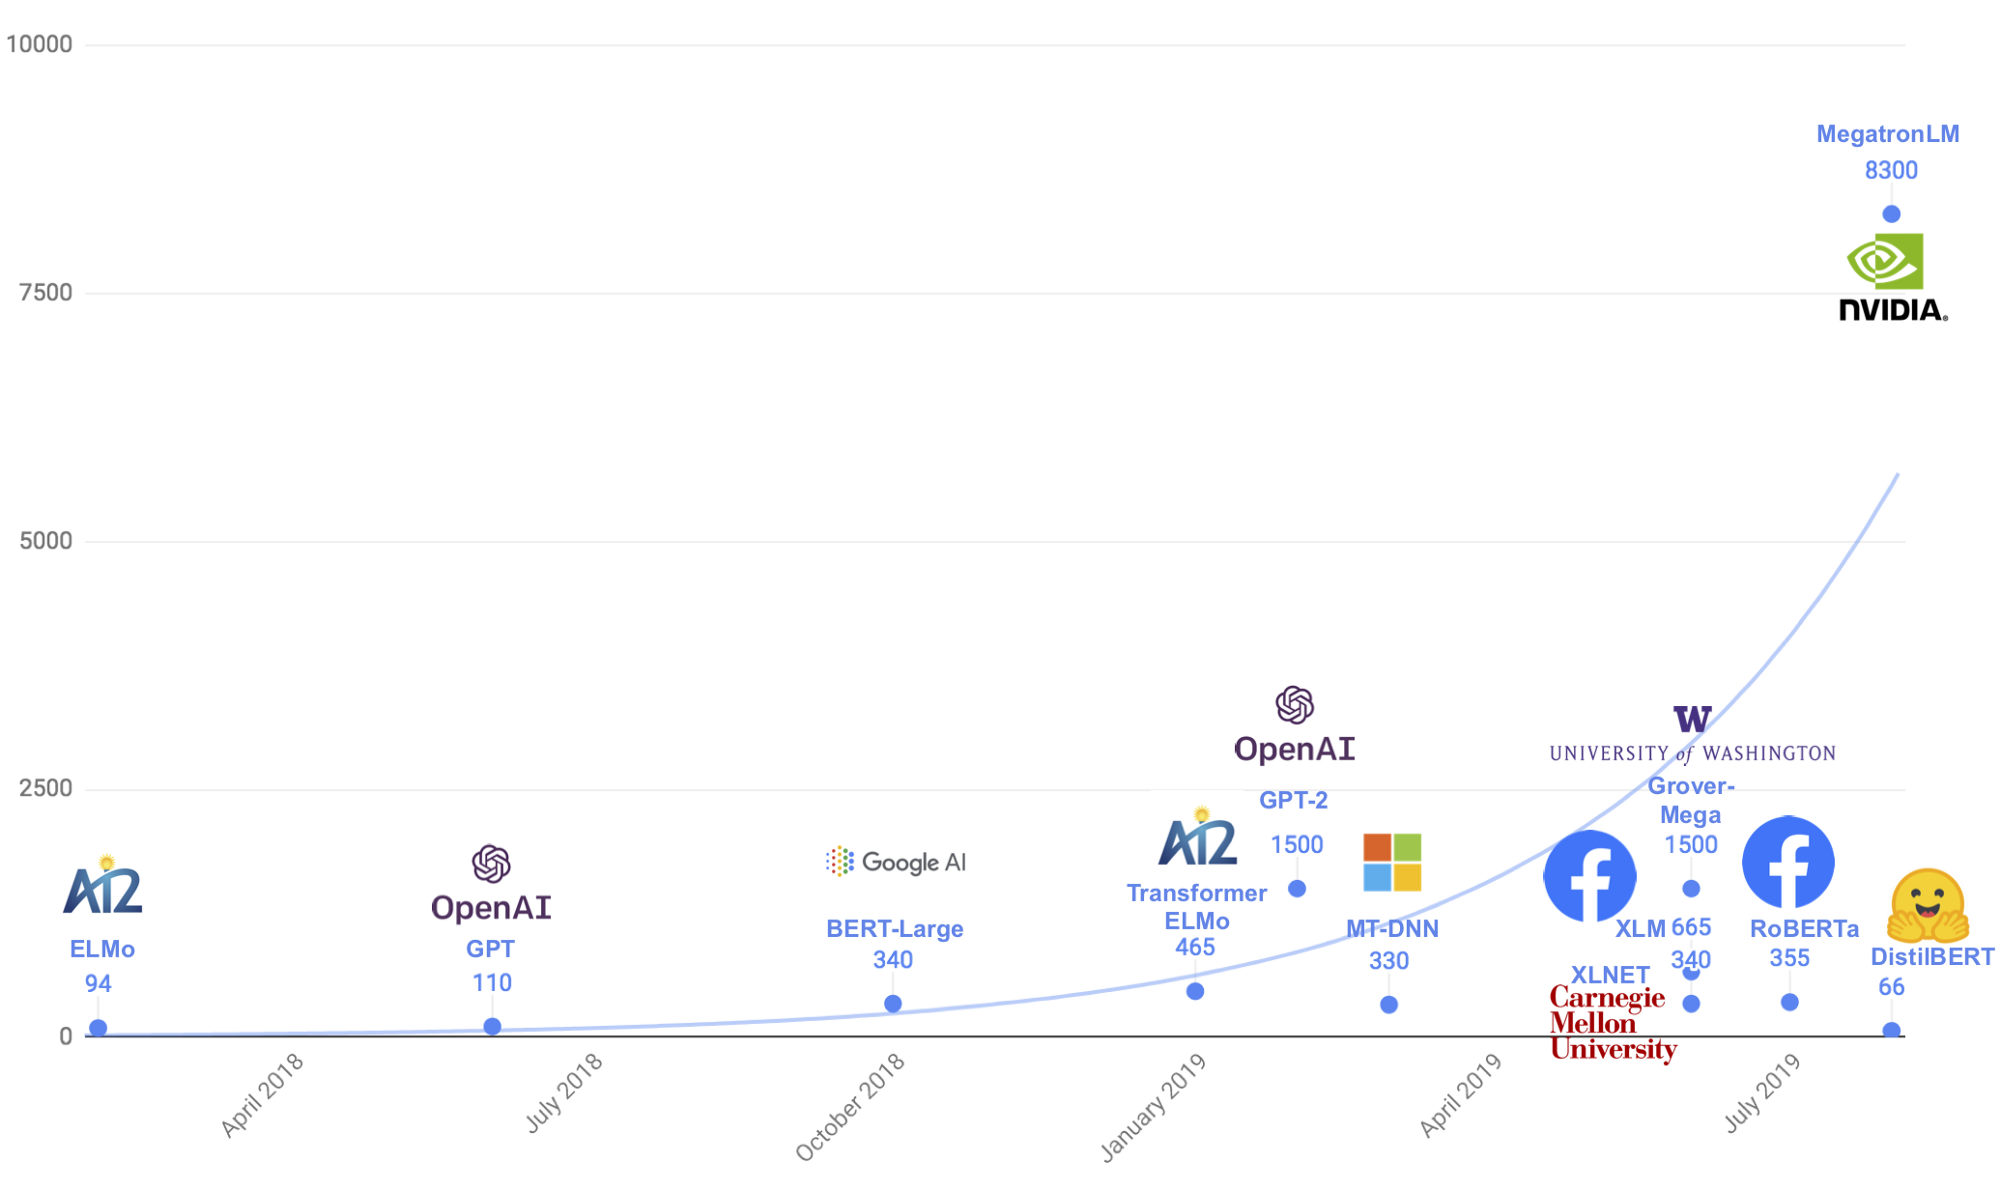

#### Why DistilBERT
 - Accurate as much as Original BERT Model
 - 60% faster
 - 40% fewer parameters
 - It can run on CPU

#### What is ktrain
ktrain is a library to help build, train, debug, and deploy neural networks in the deep learning software framework, Keras.

ktrain uses tf.keras in TensorFlow instead of standalone Keras. Inspired by the fastai library, with only a few lines of code, ktrain allows you to easily:

 - Estimate an optimal learning rate for your model given your data using a learning rate finder
 - Employ learning rate schedules such as the triangular learning rate policy, 1cycle policy, and SGDR to more effectively train your model
 - Employ fast and easy-to-use pre-canned models for both text classification (e.g., NBSVM, fastText, GRU with pre-trained word embeddings) and image classification (e.g., ResNet, Wide Residual Networks, Inception)
 - Load and preprocess text and image data from a variety of formats
 - Inspect data points that were misclassified to help improve your model
 - Leverage a simple prediction API for saving and deploying both models and data-preprocessing steps to make predictions on new raw data
 
#### Setup

`conda activate tensorflow20`

`!pip install ktrain`


#### Downloading the dataset

In [ ]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

In [ ]:
!pip install ktrain

In [ ]:
import ktrain
import numpy as np
import pandas as pd
import tensorflow as tf
from ktrain import text

In [ ]:
print(tf.__version__)

In [ ]:
# Loading the training and testing dataset

data_test = pd.read_excel(
    "/content/IMDB-Movie-Reviews-Large-Dataset-50k/test.xlsx", dtype=str
)
data_train = pd.read_excel(
    "/content/IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx", dtype=str
)

In [ ]:
# Printing the five sample datapoints

data_train.sample(5)

In [ ]:
# Printing the available text classifiers models

text.print_text_classifiers()

Install `ipywidgets` in Anaconda

In [ ]:
# text.texts_from_df return two tuples
# maxlen means it is considering that much words and rest are getting trucated
# preprocess_mode means tokenizing, embedding and transformation of text corpus(here it is considering distilbert model)

train, val, preproc = text.texts_from_df(
    train_df=data_train,
    text_column="Reviews",
    label_columns="Sentiment",
    val_df=data_test,
    maxlen=400,
    preprocess_mode="distilbert",
)

#### Observation:

You can see that it is detecting language as an English. Also, this is not multi-label classification

In [ ]:
# name = "distilbert" means, here we are using distilbert model.

model = text.text_classifier(name="distilbert", train_data=train, preproc=preproc)

In [ ]:
# Here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 400


learner = ktrain.get_learner(model=model, train_data=train, val_data=val, batch_size=6)

In [ ]:
# Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr=2e-5, epochs=2)

In [ ]:
# Creating object for predictor model

predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
data = [
    "this movie was really bad. acting was also bad. I will not watch again",
    "the movie was really great. I will see it again",
    "another great movie. must watch to everyone",
]

In [ ]:
predictor.predict(data)

## Intepretation of above results :

`this movie was really bad. acting was also bad. I will not watch again` – neg

`the movie was really great. I will see it again` – pos

`nother great movie. must watch to everyone` – pos

In [ ]:
# Printing available classes

predictor.get_classes()

In [ ]:
# return_proba = True means it will give the prediction probabilty for each class

predictor.predict(data, return_proba=True)

## Summary
 - First, We have loaded the pre-loaded the dataset and process it using pandas dataframe.
 - Thereafter we have used pre-trained model weights of distilBERT on our dataset using kTrain library.
 - Then, we have found the best learning parameter and using that we have fit the model.
 - Finally, using that model we have predicted our output.